In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [42]:
%cd /content/drive/MyDrive/7404-Project-Demo/7404Project/Stock Price Prediction
%ls

/content/drive/MyDrive/7404-Project-Demo/7404Project/Stock Price Prediction
data/  models/  mymodels/  myplots/  requirement.txt


In [43]:
# read data
df = pd.read_csv('./data/Stock_Data_with_Sentiment.csv')
train = df[:2105].set_index('Date')
test = df[2105:].set_index('Date')
df = df.set_index('Date')
sc_x = MinMaxScaler((0, 1))
sc_y = MinMaxScaler((0, 1))

data_y = train['Close']
# lag one day
data_y = pd.DataFrame(data_y).shift(-1)
data_y = data_y[:-1]
data_x = train[['High','Low','Open','Volume','Positive Sentiment','Negative Sentiment','Neutral Sentiment', 'Federal Fund Interest']]
data_x = data_x[:-1]
data_x_scale = sc_x.fit_transform(data_x)
data_y_scale = sc_y.fit_transform(data_y)

# test data: 20%
data_y = test['Close']
data_y = pd.DataFrame(data_y).shift(-1)
data_y = data_y[:-1]
data_x = test[['High','Low','Open','Volume','Positive Sentiment','Negative Sentiment','Neutral Sentiment', 'Federal Fund Interest']]
data_x = data_x[:-1]
data_x_scale_test = sc_x.transform(data_x)
data_y_scale_test = sc_y.transform(data_y)

In [ ]:
df.shape

# Decision Tree

MSE:  13775.336007730033
MAD: 46.87214007142825


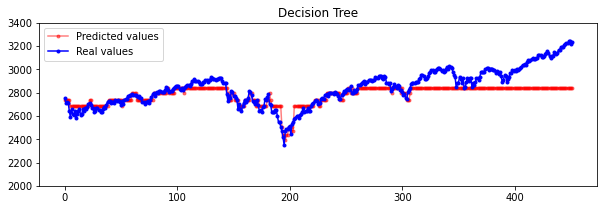

In [44]:
# Decision Tree
dtr = DecisionTreeRegressor(random_state=0)
dtr = GridSearchCV(dtr, param_grid ={'max_depth':range(1,15)},cv=5)
dtr.fit(data_x_scale, data_y_scale)

# predict
pred = dtr.predict(data_x_scale_test)
pred = pd.DataFrame({'Close':pred})
pred_inv = sc_y.inverse_transform(pred)
pred_inv = pd.DataFrame({'Close':pred_inv[:,0]})
test_y_inv = sc_y.inverse_transform(data_y_scale_test)
test_y_inv = pd.DataFrame({'Close':test_y_inv[:, 0]})

# visualization
plt.figure(figsize=(10,3))
plt.plot(pred_inv, '.-', color='red', label='Predicted values', alpha=0.5)
plt.plot(test_y_inv, '.-', color='blue', label='Real values', alpha=1)
plt.yticks(range(2000, 3600, 200))
plt.legend()
plt.title('Decision Tree')
print('MSE: ', mean_squared_error(test_y_inv, pred_inv))
print("MAD:", median_absolute_error(test_y_inv, pred_inv))

# SVM

MSE:  9082.506700550719
MAD: 59.42511166704162


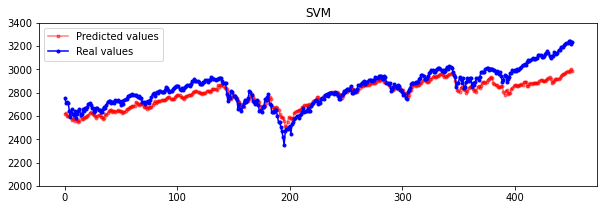

In [45]:
# SVM 
svr = SVR(kernel='linear')
svr.fit(data_x_scale, data_y_scale)
# predict
pred = svr.predict(data_x_scale_test)
pred = pd.DataFrame({'Close':pred})
pred_inv = sc_y.inverse_transform(pred)
pred_inv = pd.DataFrame({'Close':pred_inv[:,0]})
test_y_inv = sc_y.inverse_transform(data_y_scale_test)
test_y_inv = pd.DataFrame({'Close':test_y_inv[:, 0]})
# visualization
plt.figure(figsize=(10,3))
plt.plot(pred_inv, '.-', color='red', label='Predicted values', alpha=0.5)
plt.plot(test_y_inv, '.-', color='blue', label='Real values', alpha=1)
plt.yticks(range(2000, 3600, 200))
plt.title('SVM')
plt.legend()
print('MSE: ', mean_squared_error(test_y_inv, pred_inv))
print("MAD:", median_absolute_error(test_y_inv, pred_inv))

# Three layers MLP

MSE:  9760.634326932093
MAD: 87.42450222144203


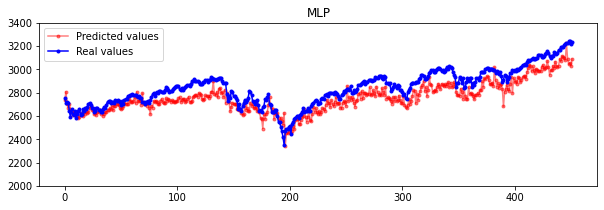

In [46]:
# three layer MLP with 100 nodes
clf = MLPRegressor( hidden_layer_sizes=(100),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=5000, shuffle=True,
    random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08)

clf.fit(data_x_scale, data_y_scale)
# predict
pred = clf.predict(data_x_scale_test)
pred = pd.DataFrame({'Close':pred})
pred_inv = sc_y.inverse_transform(pred)
pred_inv = pd.DataFrame({'Close':pred_inv[:,0]})
test_y_inv = sc_y.inverse_transform(data_y_scale_test)
test_y_inv = pd.DataFrame({'Close':test_y_inv[:, 0]})
# visualization
plt.figure(figsize=(10,3))
plt.plot(pred_inv, '.-', color='red', label='Predicted values', alpha=0.5)
plt.plot(test_y_inv, '.-', color='blue', label='Real values', alpha=1)
plt.yticks(range(2000, 3600, 200))
plt.legend()
plt.title('MLP')

print('MSE: ', mean_squared_error(test_y_inv, pred_inv))
print("MAD:", median_absolute_error(test_y_inv, pred_inv))